In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

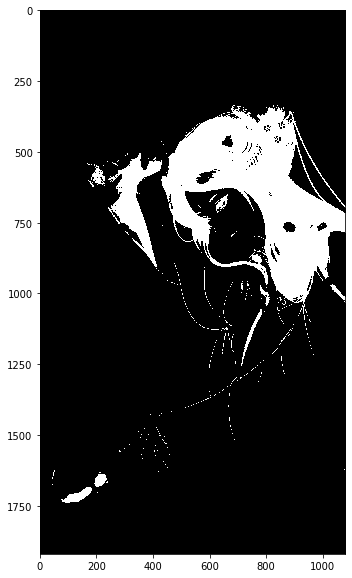

In [3]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img = cv2.threshold(img, thresh=150, maxval=255, type=cv2.THRESH_BINARY_INV)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img, cmap='gray')
plt.show()

形态学操作是根据图像形状进行的简单操作。一般情况下是对二值化（整张图像只有两种像素值：0和1，像素值为0时表示黑色，像素值为1时表示白色）图像进行的操作，需要输入两个参数，一个是原始图像，一个是被称为结构化元素或核，它用来决定操作的性质。两个基本的形态学操作是：腐蚀和膨胀。

#### 开运算
#### cv2.morphologyEx(src, op=cv2.MORPH_OPEN, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

<div class="alert alert-block alert-success"> 
   <b>先进行腐蚀操作再进行膨胀操作就叫做开运算, 被用来去除噪声</b>!
</div>

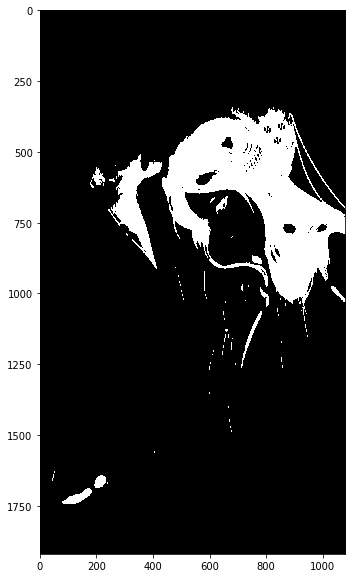

In [4]:
img_mor_open = cv2.morphologyEx(src=img, op=cv2.MORPH_OPEN, kernel=(5, 5), iterations=5)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_mor_open, cmap='gray')
plt.show()

#### 闭运算
#### cv2.morphologyEx(src, op=cv2.MORPH_CLOSE, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

<div class="alert alert-block alert-success"> 
   <b>先进行膨胀操作再进行腐蚀操作就叫做开运算，经常被用来填充前景物体中的小洞，或者前景物体上的小黑点</b>!
</div>


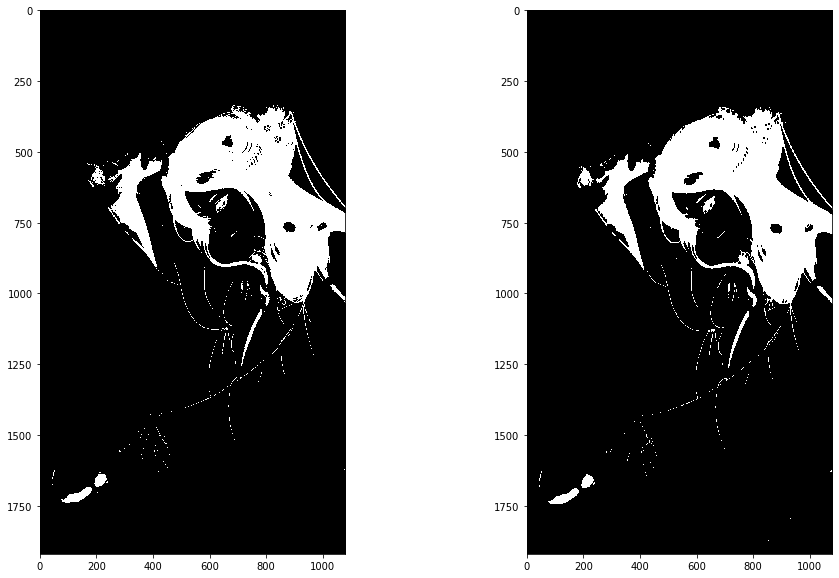

In [8]:
img_mor_close = cv2.morphologyEx(src=img, op=cv2.MORPH_CLOSE, kernel=(5, 5), iterations=5)

fig, ax = plt.subplots(1, 2, figsize=[16, 10])
ax[1].imshow(img_mor_close, cmap='gray')
ax[0].imshow(img, cmap='gray')
plt.show()

#### 形态学梯度
#### cv2.morphologyEx(src, op=cv2.MORPH_GRADIENT, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

<div class="alert alert-block alert-success"> 
   <b>分别对一幅图像进行腐蚀和膨胀，然后对腐蚀和膨胀后的图像做差，结果看上去就是前景物体的轮廓</b>!
</div>

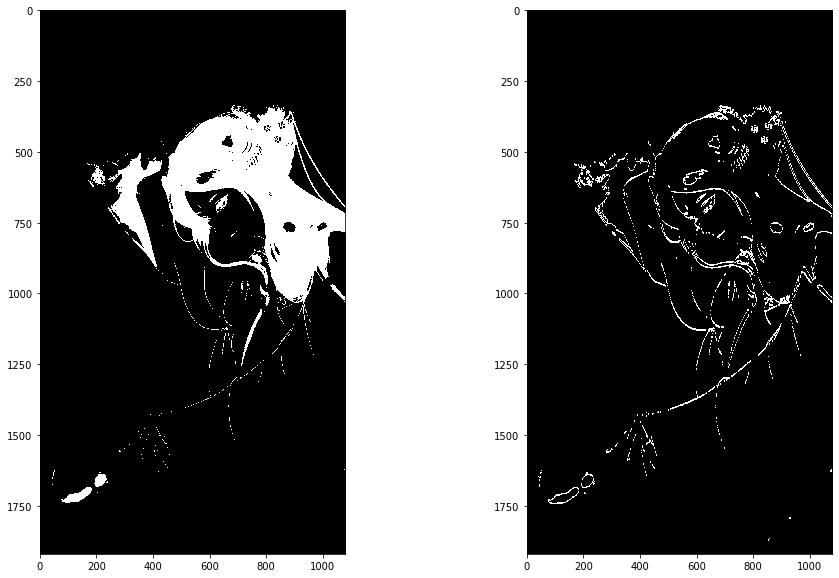

In [9]:
img_mor_gradient = cv2.morphologyEx(src=img, op=cv2.MORPH_GRADIENT, kernel=(5, 5), iterations=5)

fig, ax = plt.subplots(1, 2, figsize=[16, 10])
ax[1].imshow(img_mor_gradient, cmap='gray')
ax[0].imshow(img, cmap='gray')
plt.show()

#### 顶帽
#### cv2.morphologyEx(src, op=cv2.MORPH_TOPHAT, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

<div class="alert alert-block alert-success"> 
   <b>原图像与原图像进行开运算得到图像的差</b>!
</div>

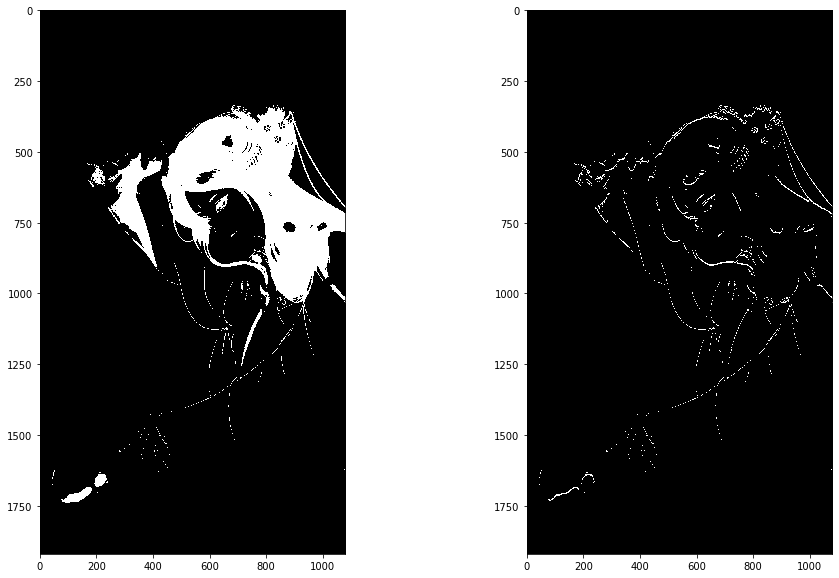

In [10]:
img_mor_tophat = cv2.morphologyEx(src=img, op=cv2.MORPH_TOPHAT, kernel=(5, 5), iterations=5)

fig, ax = plt.subplots(1, 2, figsize=[16, 10])
ax[1].imshow(img_mor_tophat, cmap='gray')
ax[0].imshow(img, cmap='gray')
plt.show()

##### 黑帽
#### cv2.morphologyEx(src, op=cv2.MORPH_TOPHAT, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

<div class="alert alert-block alert-success"> 
   <b>原图像与原图像闭运算得到的图像之间的差</b>!
</div>

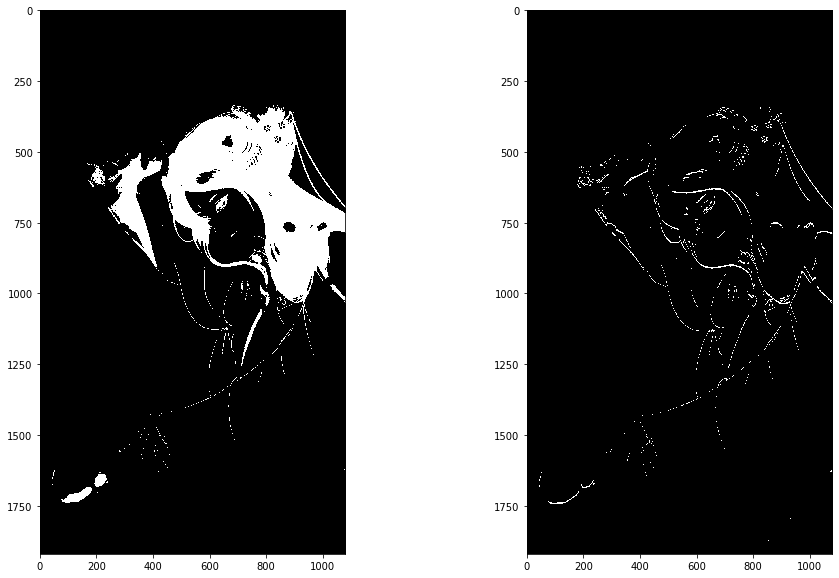

In [11]:
img_mor_blackhat = cv2.morphologyEx(src=img, op=cv2.MORPH_BLACKHAT, kernel=(5, 5), iterations=5)

fig, ax = plt.subplots(1, 2, figsize=[16, 10])
ax[1].imshow(img_mor_blackhat, cmap='gray')
ax[0].imshow(img, cmap='gray')
plt.show()

<div class="alert alert-block alert-info">   
   <b>上面所有形态学操作的kernel都是方形的，但有时我们也需要构建一个椭圆形、圆形的kernel，为了实现这种要求，Opencv提供了cv2.getStructuringElement()函数，使用该函数时只需要指定kernel的size以及形状就可以轻松构建相应的kernel</b>!
</div>

#### cv2.getStructuringElement(shape, ksize)
+ shape:指定kernel的形状
+ ksize：指定kernel的大小（tuple）

In [13]:
kernel_rect = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5, 5))
print(kernel_rect)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [15]:
kernel_ellipse = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(5, 5))
print(kernel_ellipse)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [16]:
kernel_cross = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(5, 5))
print(kernel_cross)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


<div class="alert alert-block alert-danger">   
  <b>使用不同的kernel再配合不同的形态学操作可以提取图像中的不同形态特征，例如：边缘，拐点等</b>!
</div>